In [1]:
from geomdl import NURBS
from geomdl.visualization import VisMPL
import numpy as np
from matplotlib import cm
from clifford.tools.g3c import *
from clifford.tools.g3c.rotor_parameterisation import *
from pyganja import *
from Mesher import *

Failed to import cef_gui, cef functions will be unavailable


In [2]:
def list_to_CGA(x, conf=True):
    """
    Takes 3D list coordinate of 'x'
    Returns it as a confomral point multivector.
    If False specified, then simply the 3D GA point is returned
    """
    
    c = + x[0]*e1 + x[1]*e2 - x[2]*e3
    if conf == True :
        return up(c)
    else :
        return (c)
    
def circle_from_dual(x, n, r=1):
    X = list_to_CGA(x)
    n_norm = [n[i]/np.linalg.norm(n) for i in range(3)]
    n_vec = list_to_CGA(n_norm, False)
    
    d = np.abs(np.dot(x,n_norm))
    sphere = (X - 0.5*r**2*einf)*I5
    plane = (n_vec + d*einf)*I5
    circle = meet(sphere, plane)
    if (circle**2)[()] < 0 :
        plane = (n_vec - d*einf)*I5
        circle = meet(sphere, plane)
        return circle
    else :
        
        return circle


In [61]:
#Define the 2 vectors and 2 tangents

v1 = [5,4,6]
m1 = [12,15, 9]
v4 = [13,14,12]
m4 = [12,15,9]

m = [1, 0,1]

mdir = np.array(np.array(v4)-np.array(v1))

#Bernstein polynomials for interpolation
x = np.linspace(0,1,101)
Bc0 = np.around((1-x)**3,8)
Bc1 = np.around(3*x*(1-x)**2,8)
Bc2 = np.around(3*x**2*(1-x),8)
Bc3 = np.around(x**3,8)

#Rotation lists
N = np.around(np.array([np.cos(np.pi*np.linspace(-0.5,1.5,361)), np.sin(np.pi*np.linspace(-0.5,1.5,361)), np.zeros(361)]),8)

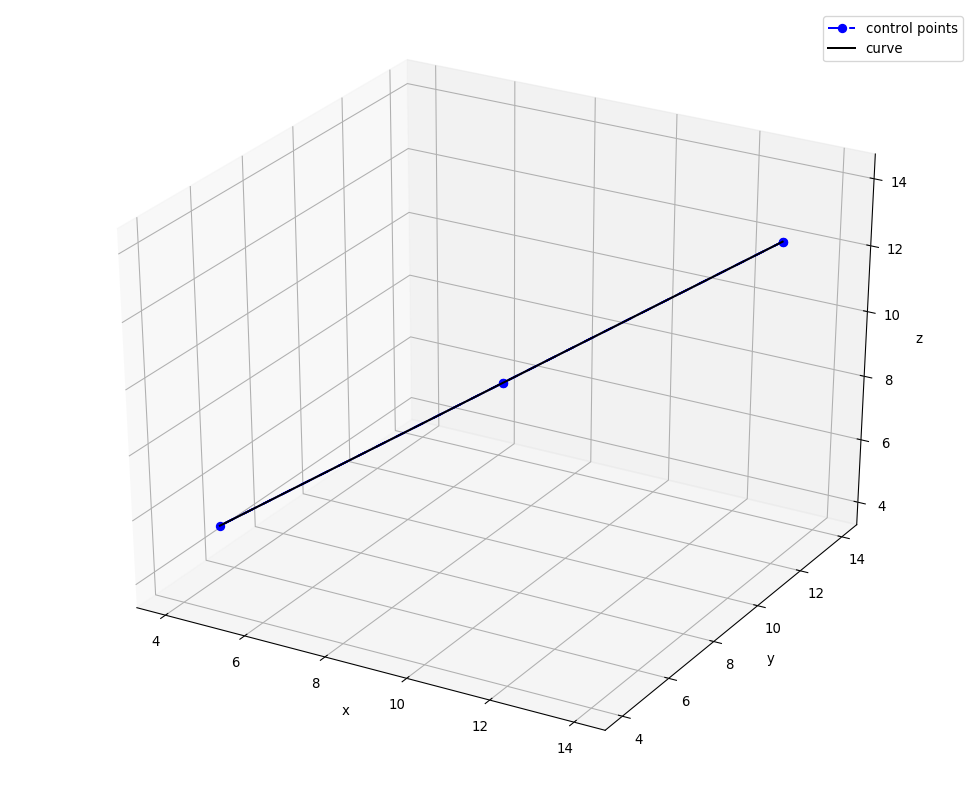

In [62]:
#Convert to Bezier Control Points
p0 = v1
p1 = [v1[i] + m1[i]/3 for i in range(3)]
p2 = [v4[i]- m4[i]/3 for i in range(3)]
p3 = v4

#Sketch NURBS with weights 1

crv = NURBS.Curve()
crv.degree = 3
crv.ctrlptsw = [p3 + [1], p0 + [1], p1 + [1], p2 + [1], p3 + [1]]
crv.knotvector = [0, 0, 0, 0, 0, 1, 1, 1, 1]

crv.vis = VisMPL.VisCurve3D()
crv.render()

NURBS_points = [list_to_CGA(crv.evalpts[i]) for i,j in enumerate(crv.evalpts)]
NURBS_pp_list = [NURBS_points[i]^NURBS_points[i+1] for i in range(len(crv.evalpts)-1)]

In [75]:
Ci1 = circle_from_dual(p0,m1)
Ci2 = circle_from_dual(p1,m1,20)


Ci3 = circle_from_dual(p2,m1,20)
Ci4 = circle_from_dual(p3,m1)


In [76]:
circle_list = [average_objects([Ci1,Ci2,Ci3,Ci4], [Bc0[i],Bc1[i],Bc2[i], Bc3[i]]) for i in range(101)]


centre_list = [normalise_n_minus_1((C*einf*C)(1)) for C in circle_list]

centre_pp_list = [centre_list[i]^centre_list[i+1] for i in range(100)]

Ci1_rep = circle_from_dual(p0, m1)
Ci4_rep = circle_from_dual(p3, m4)

circle_list_2 = circle_list
circle_list_2[0] = Ci1_rep
circle_list_2[-1] = Ci4_rep

In [77]:
sc = GanjaScene()

sc.add_objects([o(2).normal().clean(1E-4) for o in NURBS_pp_list], color.Color.RED)
sc.add_objects([o(2).normal().clean(1E-4) for o in centre_pp_list], color.Color.BLACK)
sc.add_objects([o(3).normal().clean(1E-4) for o in circle_list_2], color.Color.BLACK)
sc.add_objects([Ci1,Ci2,Ci3,Ci4], color.Color.RED)

draw(sc, 
    static=False , 
    scale=0.1,
    new_window=True)

4,1,0


In [78]:

vertex_list = vertex_circles(circle_list_2[1:-1], 11)
face_list = mesh_grid(len(circle_list_2[1:-1]), 11, mask=None, loopx=True)
gs = get_facet_scene(vertex_list, face_list)
gs.add_objects(vertex_list, static=True, color=int("FFFF4500",16))
draw(gs,scale=0.1, new_window=True)

4,1,0


In [33]:
print(np.linspace(0,10,11)[1:-1])


[1. 2. 3. 4. 5. 6. 7. 8. 9.]
